In [2]:
import numpy as np
import pysindy as ps
from pysindy.feature_library import PolynomialLibrary, FourierLibrary, CustomLibrary
import matplotlib.pyplot as plt

from generate_data import generate_tracking_data
from decimal import Decimal

In [ ]:
t = np.linspace(0, 20, 201)
x0 = [-0.1, 0.2, -0.1]
x0_val = [0.1, 0.1, 0]

x, x_dot = generate_tracking_data(t=t, x0=x0)
x_val, _ = generate_tracking_data(t=t, x0=x0_val)

In [ ]:
model = ps.SINDy(
    feature_library=PolynomialLibrary(degree=3), # 2, 1
    # feature_library=FourierLibrary(n_frequencies=1), # 2, 1
    optimizer=ps.STLSQ(threshold=0.001), # 0.001, 0.01, 0.1
    feature_names=[f'x{i+1}' for i in range(len(x[0]))]
    )
model.fit(x=x, x_dot=x_dot, t=t)
model.print()

In [ ]:
# for x_num in range(len(x0)):
#     q = 'Biblioteka funkcji & Próg & $\Dot{x}'
#     print(f'{q}_{x_num+1}$ & $E_{x_num+1}$ \\\\')
#     for i, library in enumerate([FourierLibrary(n_frequencies=2), FourierLibrary(n_frequencies=1), PolynomialLibrary(degree=3), PolynomialLibrary(degree=2), PolynomialLibrary(degree=1)]):
#         print(f'\\hline')
#         for threshold in range(3):
#             threshold = 10**(threshold-4) if i >= 2 else 100*10**(threshold-4)
#             name = ['Trygonometryczna (st. 2)', 'Trygonometryczna (st. 1)', 'Wielomiany (st. 3)', 'Wielomiany (st. 2)', 'Liniowa']
#             model = ps.SINDy(
#                 feature_library=library,
#                 optimizer=ps.STLSQ(threshold=threshold),
#                 feature_names=[f'x{i+1}' for i in range(len(x0))])
#             model.fit(x=x, x_dot=x_dot, t=t)
#             try:
#                 x_sim = model.simulate(x0=x0_val, t=t)
#             except:
#                 x_sim = x_val
#             mse = ((x_sim - x_val)**2).mean(axis=0)
#             if len(model.equations()[x_num].split('+')) > 2:
#                 eq = model.equations()[x_num].split('+')[0] + '+' + model.equations()[x_num].split('+')[1] + '\dots'
#             else:
#                 eq = model.equations()[x_num]
#             eq = eq.replace('.', ',').replace('+ -', '- ').replace('sin', '\sin').replace('cos', '\cos').replace('(1 x1)', '(x_1)').replace('(1 x2)', '(x_2)').replace('(1 x3)', '(x_3)').replace('x3', 'x_3').replace('x2', 'x_2').replace('x1', 'x_1').replace('(1 u)', '(u)')
#             E = '%.2E' % Decimal(str(mse[x_num]))
#             print(f"{name[i]} & {(str(threshold).replace('.', ',') + ' &').replace(',0 &', ' &')} ${eq}$ & ${E.replace('.', ',')}$ \\\\")
#     print('\n\n')

In [ ]:
x_sim = model.simulate(x0=x0_val, t=t)
mse = ((x_sim - x_val)**2).mean(axis=0)
print(f'Błąd średniokwadratowy x1: {mse[0]}, x2: {mse[1]}, x3: {mse[2]}')

In [ ]:
plt.plot(t, x_val[:, 0])
plt.plot(t, x_val[:, 1])
plt.plot(t, x_val[:, 2], 'y')
plt.legend(["Kąt natarcia", "Kąt nachylenia", "Współczynnik nachylenia"])
plt.xlim(0, max(t))
plt.xlabel("Czas [s]")
plt.ylabel("Rad")

plt.grid()
plt.show()

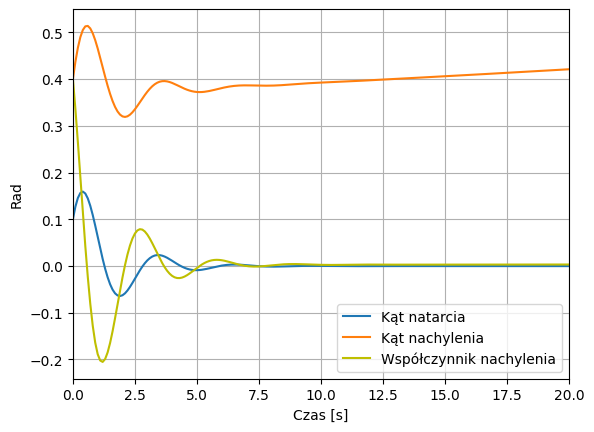

In [11]:
t = np.linspace(0, 20, 201)
x0 = [0.1, 0.4, 0.4]
x, _ = generate_tracking_data(t=t, x0=x0)
plt.plot(t, x[:, 0])
plt.plot(t, x[:, 1])
plt.plot(t, x[:, 2], 'y')
plt.legend(["Kąt natarcia", "Kąt nachylenia", "Współczynnik nachylenia"])
plt.xlim(0, max(t))
plt.xlabel("Czas [s]")
plt.ylabel("Rad")
plt.grid()
plt.savefig(f'imgs/proces-2 {x0[0]}-{x0[1]}-{x0[2]}'.replace('.', ''), dpi=300, bbox_inches='tight')
plt.show()